<a href="https://colab.research.google.com/github/franklin-univ-data-science/comp411/blob/master/Module01_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework  1

1. Import pandas and load the olympics.csv. 
   Show the first 10 rows. 
Here is the URL of dagta: https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv
1. Select only the NOC column using both the bracket and dot notations, show the top 5 rows . 
1. Select the rows of men's gold medals in singles badminton, and sort the results alphabetically by the player's names (note that here are four conditions). 
1. List the top three countries (NOC column) that won the most medals from 1984 (inclusive) to present.
1. Plot the number of medals of the top 3 athlete in 2008 using matplotlib.pyplot.
   - use bar chart
   - use value_counts(); note the returned results is a Series. So, the x axis is the index of Series.
1. Use list comprehension to define a new column "is_US". When the country is USA, the value of is_US is True, otherwise the value is False.
1. Hide the medal information for 1988 olympics; i.e., when edition is 1988, change the Medal as "Unknown". (use the .loc)
1. In two to three paragraphs of prose (i.e. sentences, not bullet lists), summarize and interact with the content that was covered this week in readings and in class meeting. In your summary, you should highlight the major topics, methods, and practices that were covered. Your summary should also interact with the material through personal observations, reflections, and applications to the field of study. In particular, highlight what surprised, enlightened, or otherwise engaged you. In other words, you should think and write critically not just about what was presented but also what you have learned through the session.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv')
df.head(10)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


In [2]:
df['NOC'].head(5)

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

In [3]:
df.NOC.head(5)

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

In [4]:
goldmen = df[(df.Sport == 'Badminton') & (df.Gender == 'Men')& (df.Event == 'singles') & (df.Medal == 'Gold')]
goldmen = goldmen.sort_values(by=['Athlete'])
goldmen

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,M,Gold
23717,Sydney,2000,Badminton,Badminton,"JI, Xinpeng",CHN,Men,singles,M,Gold
27741,Beijing,2008,Badminton,Badminton,"LIN, Dan",CHN,Men,singles,M,Gold


In [5]:
eightfour = df[(df.Edition >= 1984)]
eightfour.NOC.value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

<AxesSubplot:>

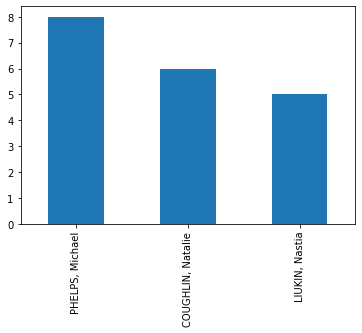

In [6]:
import matplotlib.pyplot as plt

eight = df[(df.Edition == 2008)]
medals = eight.Athlete.value_counts().head(3)
medals.plot.bar()

In [7]:
df['is_US'] = 0
df.loc[df.NOC == 'USA', 'is_US'] = True
df.loc[df.NOC != 'USA', 'is_US'] = False
df.head(15)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,is_US
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,False
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,False
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,False
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,False
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,False
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze,False
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold,False
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver,False
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze,False
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold,False


In [8]:
df.loc[df.Edition == 1988, 'Medal'] = 'Unknown'
eighttwice = df[(df.Edition == 1988)]
eighttwice.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,is_US
18051,Seoul,1988,Aquatics,Diving,"MENA CAMPOS, Jesus",MEX,Men,10m platform,M,Unknown,False
18052,Seoul,1988,Aquatics,Diving,"LOUGANIS, Gregory",USA,Men,10m platform,M,Unknown,True
18053,Seoul,1988,Aquatics,Diving,"XIONG, Ni",CHN,Men,10m platform,M,Unknown,False
18054,Seoul,1988,Aquatics,Diving,"WYLAND-WILLIAMS, Wendy Lian",USA,Women,10m platform,W,Unknown,True
18055,Seoul,1988,Aquatics,Diving,"XU, Yan-Mei",CHN,Women,10m platform,W,Unknown,False


    This week we started with basic Python syntax and how to use pandas to work with our data. The syntax for Python is one that I know well as I have previously worked on Python and Java. The lecture notes go over different starters such as the hello world and the basic setting variables. For my classes I have had to go back and forth between Python and Java so starting with a basic syntax is a nice reminder to help seperate the two languages. 
    The pandas are a new topic for me to work with which I am finding fun to work on. The pandas help a lot with understanding the data and being able to read and edit cvs files. The lecture explains how to read and edit the data of the cvs files in a way that I found easy to follow along with. I compared that data from the file itself and the one that was read through the pandas and the panda lays out the data in an easy to follow way that helps with identifying the columns and information in the rows. Creating charts is always something that I found intimidating but how it was shown in the lecture helped put my mind at ease and understand the chart creation. My question is how often in your working career have you used pandas? I can see the use of them and hope that they will be used in my future classes.